# Importing dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


# Data exposure

In [2]:
print ('train_data sample:')
print (train_data[0])
print ('train_labels sample:')
print (train_labels[0])

train_data sample:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_labels sample:
1


In [3]:
print ('train_data shape:')
print (train_data.shape)
print ('train_labels shape:')
print (train_labels.shape)
print ('test_data shape:')
print (test_data.shape)
print ('test_labels shape:')
print (test_labels.shape)

train_data shape:
(25000,)
train_labels shape:
(25000,)
test_data shape:
(25000,)
test_labels shape:
(25000,)


### Decode the words

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
sample_word = train_data[1]

def decode_word(sample_word):
    decode_sample_word = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_word]) 
    return decode_sample_word
    # 0 = padding
    # 1 = start of sequence
    # 2 = unknown

print (decode_word(sample_word))

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


# Preparing Data

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print ('train sample:')
print (x_train[0])
print ('test sample:')
print (x_test[0])

train sample:
[0. 1. 1. ... 0. 0. 0.]
test sample:
[0. 1. 1. ... 0. 0. 0.]


In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print ('train sample:')
print (y_train[0])
print ('test sample:')
print (y_test[0])

train sample:
1.0
test sample:
0.0


# Model Create

In [8]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer= optimizers.RMSprop(lr= 0.001),
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Validating appoach

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Fit the model

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.5115 - accuracy: 0.7921 - val_loss: 0.3910 - val_accuracy: 0.8734
Epoch 2/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.3089 - accuracy: 0.9050 - val_loss: 0.3089 - val_accuracy: 0.8857
Epoch 3/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.2226 - accuracy: 0.9278 - val_loss: 0.3255 - val_accuracy: 0.8664
Epoch 4/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1739 - accuracy: 0.9445 - val_loss: 0.3121 - val_accuracy: 0.8750
Epoch 5/20
15000/15000 [==============================] - 1s 54us/step - loss: 0.1429 - accuracy: 0.9533 - val_loss: 0.2811 - val_accuracy: 0.8898
Epoch 6/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.1164 - accuracy: 0.9649 - val_loss: 0.3022 - val_accuracy: 0.8833
Epoch 7/20
15000/15000 [==============================] - 1s 54us/

In [11]:
history.history

{'val_loss': [0.3910465792655945,
  0.30887838048934935,
  0.32553385224342346,
  0.31209598426818846,
  0.2810703501224518,
  0.30215612230300903,
  0.31890133481025695,
  0.3693142418384552,
  0.3608984966278076,
  0.4094558352947235,
  0.40885965700149535,
  0.46461765213012696,
  0.4797836804866791,
  0.5045887627124787,
  0.536621912765503,
  0.5714129912853241,
  0.7011701006889344,
  0.6359203424453735,
  0.724642096233368,
  0.7119466745376587],
 'val_accuracy': [0.8733999729156494,
  0.885699987411499,
  0.8664000034332275,
  0.875,
  0.8898000121116638,
  0.8833000063896179,
  0.8823000192642212,
  0.8738999962806702,
  0.8790000081062317,
  0.8708000183105469,
  0.8761000037193298,
  0.8695999979972839,
  0.8722000122070312,
  0.8729000091552734,
  0.8715999722480774,
  0.8715999722480774,
  0.8532999753952026,
  0.8691999912261963,
  0.8586000204086304,
  0.8648999929428101],
 'loss': [0.5114857258001964,
  0.30888138774236046,
  0.2225818947394689,
  0.17393247067928314,
 

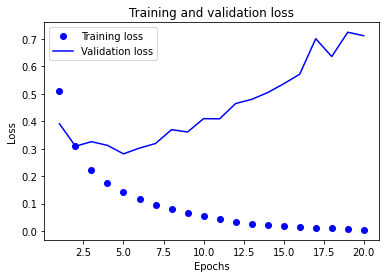

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+ 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

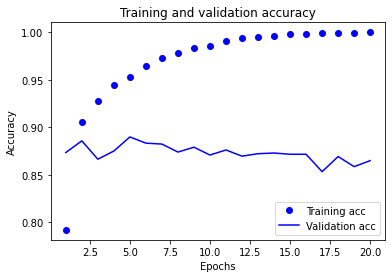

In [13]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']


plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Retrain the model

In [14]:
model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs= 4,
                    batch_size=512
                   )

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.2319 - accuracy: 0.9466
Epoch 2/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.1372 - accuracy: 0.9599
Epoch 3/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.1072 - accuracy: 0.9680
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [15]:
results

[0.4930008775544167, 0.8595600128173828]

In [16]:
print ('Model result:')
print ('loss value: ', results[0])
print ('accuracy value: ', results[1])

Model result:
loss value:  0.4930008775544167
accuracy value:  0.8595600128173828
